In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Styles
plt.style.use('ggplot')
sns.set_style('whitegrid')
sns.set()

# Warning
import warnings
warnings.filterwarnings('ignore')

# Text Preprocessing
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import spacy
nlp = spacy.load("en_core_web_sm")

In [2]:
# loading the dataset

raw_sms = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
# Checking top 10 rows

raw_sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
# Selecting First two columns

sms = raw_sms.iloc[:, :2]

In [5]:
sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# Renaming the columns

sms.rename(columns={'v1': "Label", 'v2':"Text"}, inplace=True)

In [7]:
sms.head()

,Label,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Exploratory Data Analysis

In [8]:
# Lets look at the dataset info to see if everything is alright

sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
# Checking the Category (SPAM vs HAM) unique count

sms['Label'].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

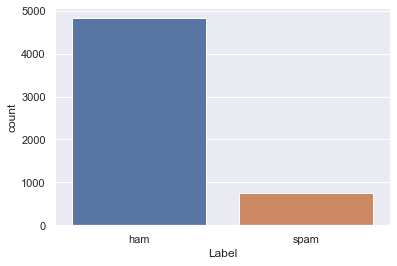

In [10]:
sns.countplot(x='Label', data=sms)

In [11]:
# Overall length of each spam and ham messages

sms['Length'] = sms['Text'].map(lambda x: len(x))

array([[<AxesSubplot:title={'center':'Length'}>]], dtype=object)

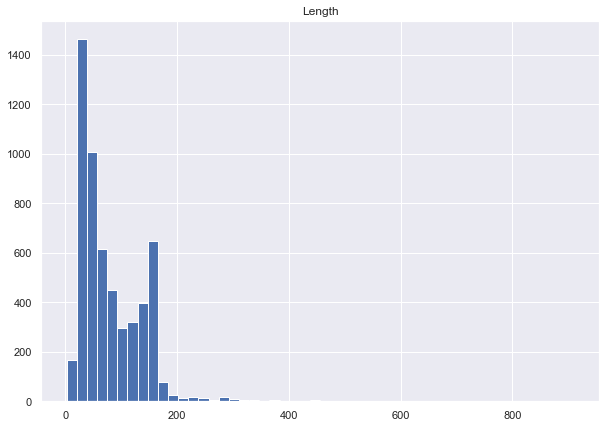

In [12]:
# checking the histogram 

sms.hist(column='Length', bins=50, figsize=(10, 7))

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

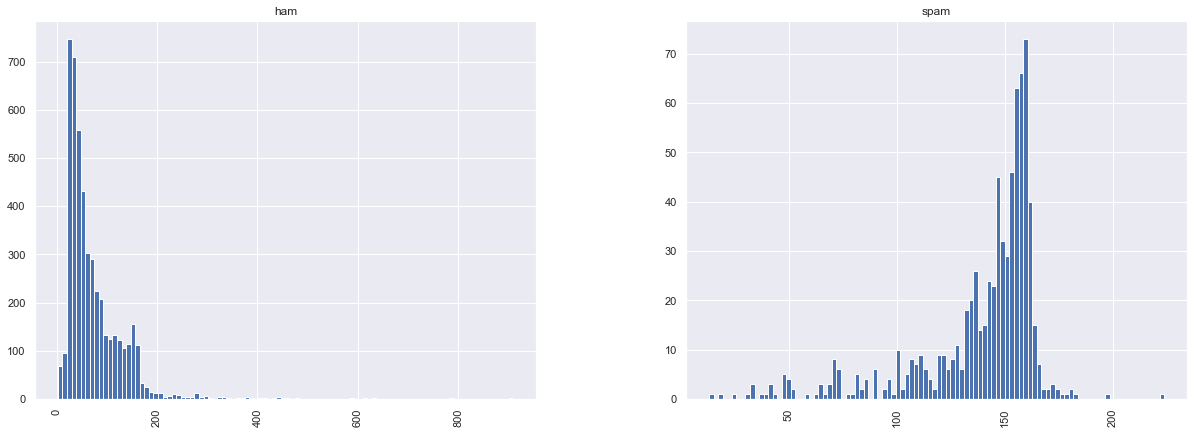

In [13]:
# Overall length of length of spam and ham messages

sms.hist(column='Length', by='Label', bins=100, figsize=(20,7))

### Checking the Percentage of SPAM / HAM

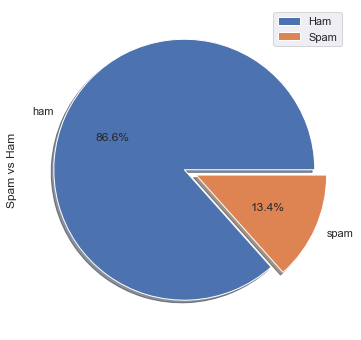

In [14]:
sms["Label"].value_counts().plot(kind = 'pie', explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

<span>
As the dataset is imbalanced, 86.6% consists of normal message and 13.4% consists of spam message.
</span>


<span>
We need to use Stratified sampling while splitting the dataset into training and testing set, otherwise we have a chance of our training model being skewed towards normal messages.
</span>

In [15]:
# let see the Top Spam / Ham sms by count

topSMS = sms.groupby('Text')['Label'] \
            .agg([len, np.max])  \
            .sort_values(by='len', ascending=False) \
            .head(n=20)

print(topSMS)

                                                    len  amax
Text                                                         
Sorry, I'll call later                               30   ham
I cant pick the phone right now. Pls send a mes...   12   ham
Ok...                                                10   ham
Your opinion about me? 1. Over 2. Jada 3. Kusru...    4   ham
Wen ur lovable bcums angry wid u, dnt take it s...    4   ham
Please call our customer service representative...    4  spam
Okie                                                  4   ham
Say this slowly.? GOD,I LOVE YOU &amp; I NEED Y...    4   ham
7 wonders in My WORLD 7th You 6th Ur style 5th ...    4   ham
Ok.                                                   4   ham
Ok                                                    4   ham
Today is ACCEPT DAY..U Accept me as? Brother Si...    3   ham
Watching cartoon, listening music &amp; at eve ...    3   ham
I'm in a meeting, call me later at                    3   ham
Loan for

In [16]:
# Splitting dataframe by groups formed from unique column values i.e., Spam and Ham

grouped = sms.groupby(sms.Label)
spamSMS = grouped.get_group("spam")
hamSMS = grouped.get_group("ham")

In [17]:
# splitting the data in spam and ham

spam_sms = sms[sms["Label"] == "spam"]["Text"]
ham_sms = sms[sms["Label"] == "ham"]["Text"]

In [18]:
# converting the series to string

spam_sms = spam_sms.to_string()
ham_sms = ham_sms.to_string()

In [19]:
# Function to extract spam words using word_tokenizer

def extract_spam_words(spamMessage):
    words = word_tokenize(spamMessage)
    return words

In [20]:
# Function to extract ham words using word_tokenizer

def extract_ham_words(hamMessage):
    words = word_tokenize(hamMessage)
    return words
    

### Creating Spam and Ham word clouds
Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.

In [21]:
# Creating corpus for spam and ham message

spam_words = extract_spam_words(spam_sms)
ham_words = extract_ham_words(ham_sms)

### SPAM Wrod Cloud

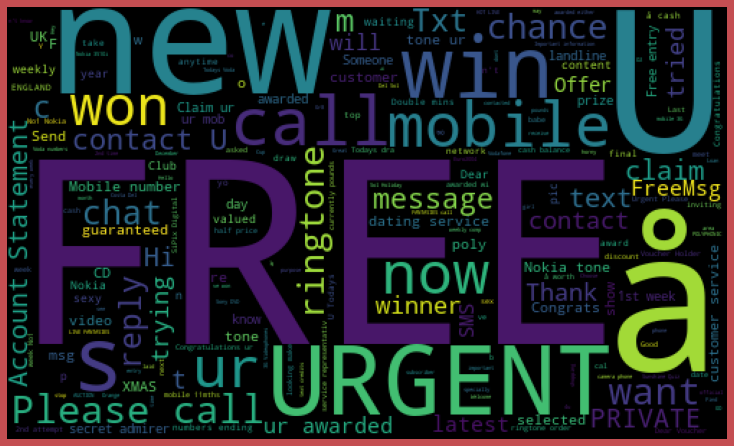

In [22]:
from wordcloud import WordCloud

spam_wordcloud = WordCloud(width=500, height=300).generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='r')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

### HAM Word Cloud

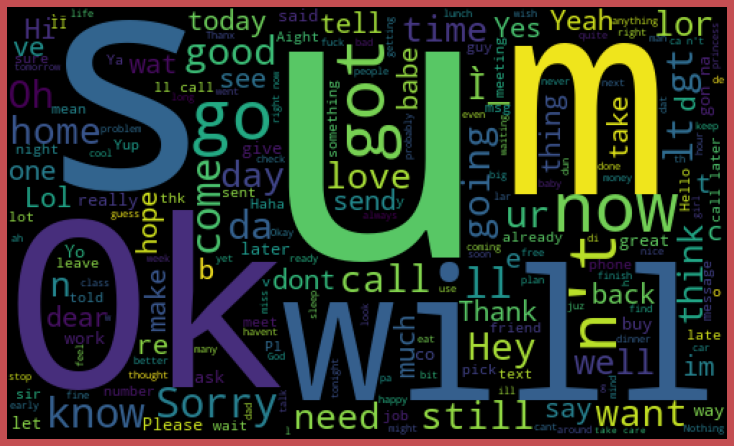

In [23]:
ham_wordcloud = WordCloud(width=500, height=300).generate(" ".join(ham_words))
plt.figure( figsize=(10,8), facecolor='r')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [24]:
# Top 10 spam words

spam_words = np.array(spam_words)
print("Top 10 Spam words are :\n")
pd.Series(spam_words).value_counts().head(n = 10)

Top 10 Spam words are :



...     716
!       213
a       190
to      160
.       142
your     91
,        90
you      82
is       79
2        75
dtype: int64

# Data pre-processing

In [25]:
# Removing punctuations and stopwords from the text data.

import string
def text_process(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = [word for word in text.split() if word.lower() not in stopwords.words('english')]
    return " ".join(text)
   

In [26]:
sms['Text'] = sms['Text'].apply(text_process)

In [27]:
sms.head()

,Label,Text,Length
0,ham,Go jurong point crazy Available bugis n great ...,111
1,ham,Ok lar Joking wif u oni,29
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...,155
3,ham,U dun say early hor U c already say,49
4,ham,Nah dont think goes usf lives around though,61


In [28]:
# Replacing ham with 0 and spam with 1

sms = sms.replace(['ham','spam'],[0, 1])
sms.head()

,Label,Text,Length
0,0,Go jurong point crazy Available bugis n great ...,111
1,0,Ok lar Joking wif u oni,29
2,1,Free entry 2 wkly comp win FA Cup final tkts 2...,155
3,0,U dun say early hor U c already say,49
4,0,Nah dont think goes usf lives around though,61


###  Converting words to vectors using TFIDF Vectorizer

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(sms['Text'])

In [30]:
X = vectors
y = sms['Label']

In [31]:
X.shape

(5572, 9376)

In [32]:
y.shape

(5572,)

### Splitting into training and test set

In [33]:
from sklearn.model_selection import train_test_split

# using stratify sampling as we have imbalace dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)

In [34]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(4457, 9376)
(1115, 9376)
(4457,)
(1115,)


### Training using Naive Bayes MultinomialNB

In [35]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB()
spam_detect_model.fit(X_train, y_train)

MultinomialNB()

In [36]:
# Let's check the outputs of the model
# I'll store them in y_hat_test as this is the 'theoretical' name of the predictions
y_hat_test = spam_detect_model.predict(X_test)
y_hat_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Evaluation
<span> We can check precision,recall,f1-score using classification report!</span>

In [37]:
from sklearn.metrics import classification_report

In [38]:
print(classification_report(y_test, y_hat_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       966
           1       1.00      0.71      0.83       149

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.90      1115
weighted avg       0.96      0.96      0.96      1115



In [39]:
from sklearn import metrics
print("Accuracy ", metrics.accuracy_score(y_test, y_hat_test))

Accuracy  0.9614349775784753


###  Hyper parameter tuning

Finding best possible hyper-parameters

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
# creating classifier
clf = MultinomialNB()

In [42]:
clf.get_params().keys()

dict_keys(['alpha', 'class_prior', 'fit_prior'])

In [43]:
 # creating Hyper-parameter search space

# paramter for smoothing
alphas = [0.01, 0.1, 1.0]
# final Hyperparameter Options
hyperparameters = dict(alpha = alphas)

In [44]:
# define search

# Creating GridSearch using 10-fold cross validation
search = GridSearchCV(clf, hyperparameters, cv=10, scoring='accuracy', verbose=3, n_jobs=-1)

In [45]:
# Execute search
best_model = search.fit(X_train,y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


In [46]:
print("Tuned Hyperparameters : (best parameters) ", best_model.best_params_)

Tuned Hyperparameters : (best parameters)  {'alpha': 0.1}


In [47]:
print("Accuracy : ", best_model.best_score_)

Accuracy :  0.9800312389781831


### Training the model with best_parameters obtained by hyerparameters

In [48]:
classifier = MultinomialNB(alpha=0.1)
model = classifier.fit(X_train, y_train)

### Testing

In [49]:
y_hat = model.predict(X_test)
y_hat

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
from sklearn import metrics
print("Accuracy ", metrics.accuracy_score(y_test, y_hat))

Accuracy  0.9775784753363229


In [51]:
# Creating the dataframe of the predicted values
df = pd.DataFrame(y_hat, columns=['Prediction'])
df.head()

,Prediction
0,0
1,0
2,0
3,0
4,0


In [52]:
# We can include the test targets in data frame (so we can manually compare them)
df['Target'] = y_test
df

,Prediction,Target
0,0,NaN
1,0,NaN
2,0,NaN
3,0,NaN
4,0,NaN
...,...,...
1110,0,0.0
1111,0,0.0
1112,0,NaN
1113,0,NaN


In [53]:
# In y_test, old indexes are preserved 

# Therefore, to get a proper result, we must reset the index and drop the old indexing
y_test = y_test.reset_index(drop=True)

# Check the result
y_test.head()

0    0
1    0
2    0
3    0
4    0
Name: Label, dtype: int64

In [54]:
# Let's overwrite the 'Target' column with the appropriate values
df['Target'] = y_test
df

,Prediction,Target
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
1110,0,0
1111,0,0
1112,0,0
1113,0,0


In [55]:
# Replacing the ham with 0 and spam with 1
# df = df.replace([0,1],['ham', 'spam'])
# df.head(20)

In [56]:
# function to display text message
def find(p):
    if p == 1:
        print("SMS is SPAM")
    else:
        print("SMS is NOT spam")

In [57]:
text1 = ["Free tones Hope you enjoyed your new content"]
text2 = ["No. I meant the calculation is the same. That I'll call later"]
text3 = ["Had your contract mobile 11 Mnths? Latest Motorola Now"]
text4 = ["WINNER!! You just won a free ticket to Bahamas. Send your Details"]
text5 = ["Hey there, How are you?"]

integers1 = vectorizer.transform(text1)
integers2 = vectorizer.transform(text2)
integers3 = vectorizer.transform(text3)
integers4 = vectorizer.transform(text4)
integers5 = vectorizer.transform(text5)

In [58]:
p1 = best_model.predict(integers1)[0]
p2 = best_model.predict(integers2)[0]
p3 = best_model.predict(integers3)[0]
p4 = best_model.predict(integers4)[0]
p5 = best_model.predict(integers5)[0]


find(p1)
find(p2)
find(p3)
find(p4)
find(p5)

SMS is SPAM
SMS is NOT spam
SMS is SPAM
SMS is SPAM
SMS is NOT spam


In [59]:
text11 = ["Free tones Hope you enjoyed your new content"]
text21 = ["No. I meant the calculation is the same. That I'll call later."]
text31 = ["Had your contract mobile 11 Mnths? Latest Motorola Now"]
text41 = ["WINNER!! You just won a free ticket to Bahamas. Send your Details"]
text51 = ["Hey there, How are you?"]

integers11 = vectorizer.transform(text11)
integers21 = vectorizer.transform(text21)
integers31 = vectorizer.transform(text31)
integers41 = vectorizer.transform(text41)
integers51 = vectorizer.transform(text51)

In [60]:
p11 = model.predict(integers11)[0]
p21 = model.predict(integers21)[0]
p31 = model.predict(integers31)[0]
p41 = model.predict(integers41)[0]
p51 = best_model.predict(integers51)[0]

find(p11)
find(p21)
find(p31)
find(p41)
find(p51)

SMS is SPAM
SMS is NOT spam
SMS is SPAM
SMS is SPAM
SMS is NOT spam
